In [1]:
import geopandas
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
land_df = geopandas.read_file("data-giammaria/land.topojson")

In [3]:
choro_df = geopandas.read_file("data-giammaria/brown_and_black_chloropleths.topojson")

In [4]:
features_df = geopandas.read_file("data-giammaria/features.topojson")

In [5]:
choro_df.head()

,id,name,fill,geometry
0,None,black1,#000,"POLYGON ((-16.30474 17.55725, 38.90315 16.6037..."
1,None,black2,#000,"POLYGON ((-35.41727 -5.22919, -34.48895 -8.712..."
2,None,black3,#000,"POLYGON ((-78.06550 34.13629, -80.08597 32.871..."
3,None,black4,#000,"POLYGON ((-84.86410 21.91606, -84.39994 22.032..."
4,None,black5,#000,"POLYGON ((-76.18155 17.92697, -76.31807 17.868..."


<Axes: >

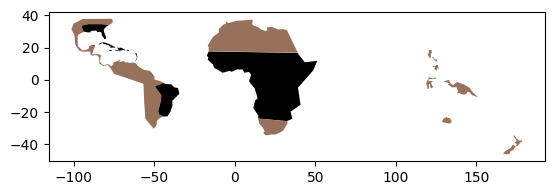

In [6]:
choro_df.plot(color=choro_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})

In [7]:
plt.rcParams['figure.figsize'] = [14, 12]

<Axes: >

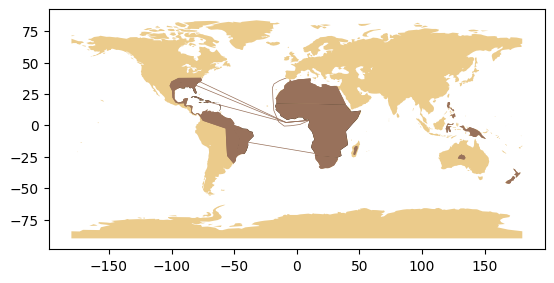

In [189]:
f, ax = plt.subplots()
land_df.plot(color='#ebcb8b', ax=ax)
choro_df.plot(color=choro_df.fill, ax=ax)
features_df.plot(color="#98715B", linewidth=0.5, ax=ax)

In [29]:
land_df = land_df.set_crs('epsg:3395')

In [30]:
import pyproj

aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=5, lon_0=-115).srs

In [31]:
land_df = land_df.to_crs(crs=aeqd)

In [13]:
#land_df = land_df.to_crs('+proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs ')

<Axes: >

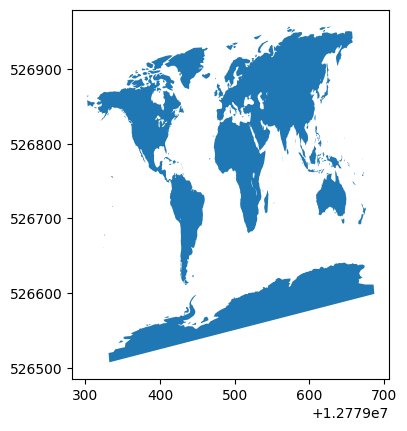

In [14]:
land_df.plot()

In [28]:
land_df.crs

<Projected CRS: +proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +a=637 ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [6]:
from cartopy import crs

<Axes: >

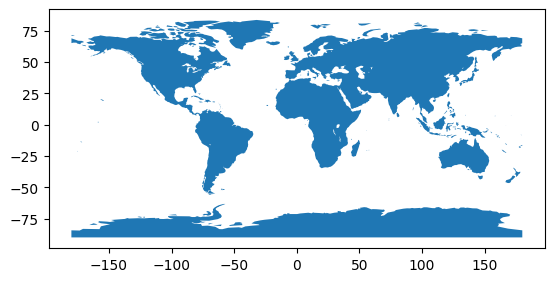

In [7]:
ae = crs.AzimuthalEquidistant()
aeproj4 = ae.proj4_init
land_ae = land_df.to_crs(aeproj4)
land_ae.plot()

In [9]:
from mpl_toolkits.basemap import Basemap

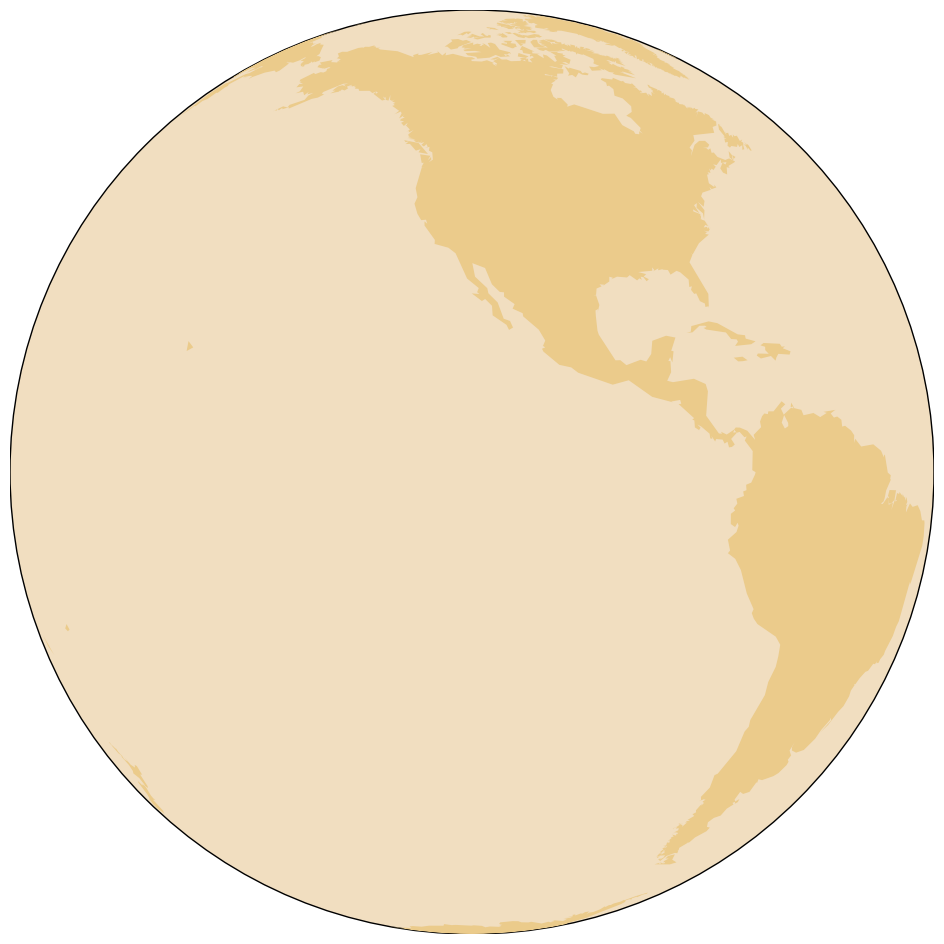

In [23]:
map_left = Basemap(projection='ortho', lon_0=-115, lat_0=5)
map_left.drawmapboundary(fill_color='#f1dec0'), 
map_left.fillcontinents(color='#ebcb8b',lake_color='#ebcb8b')
plt.show()

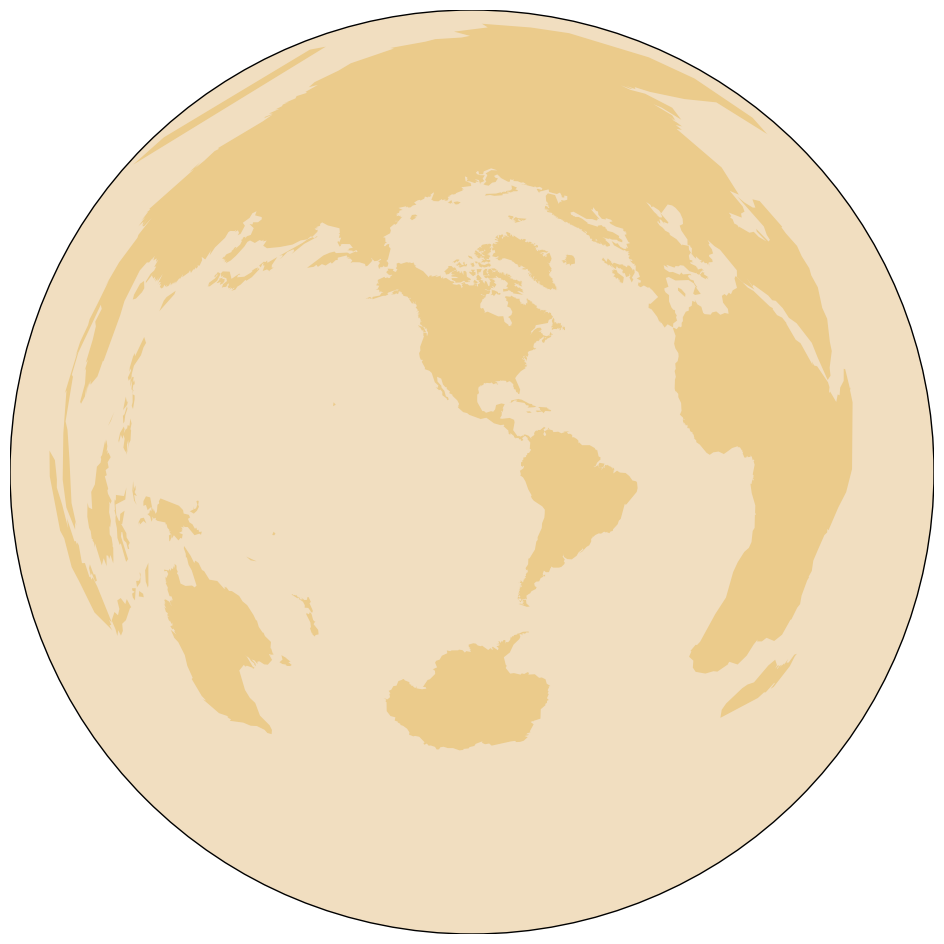

In [17]:
map_left = Basemap(projection='aeqd', lon_0=-100, lat_0=-5)
map_left.drawmapboundary(fill_color='#f1dec0'), 
map_left.fillcontinents(color='#ebcb8b',lake_color='#ebcb8b')
plt.show()

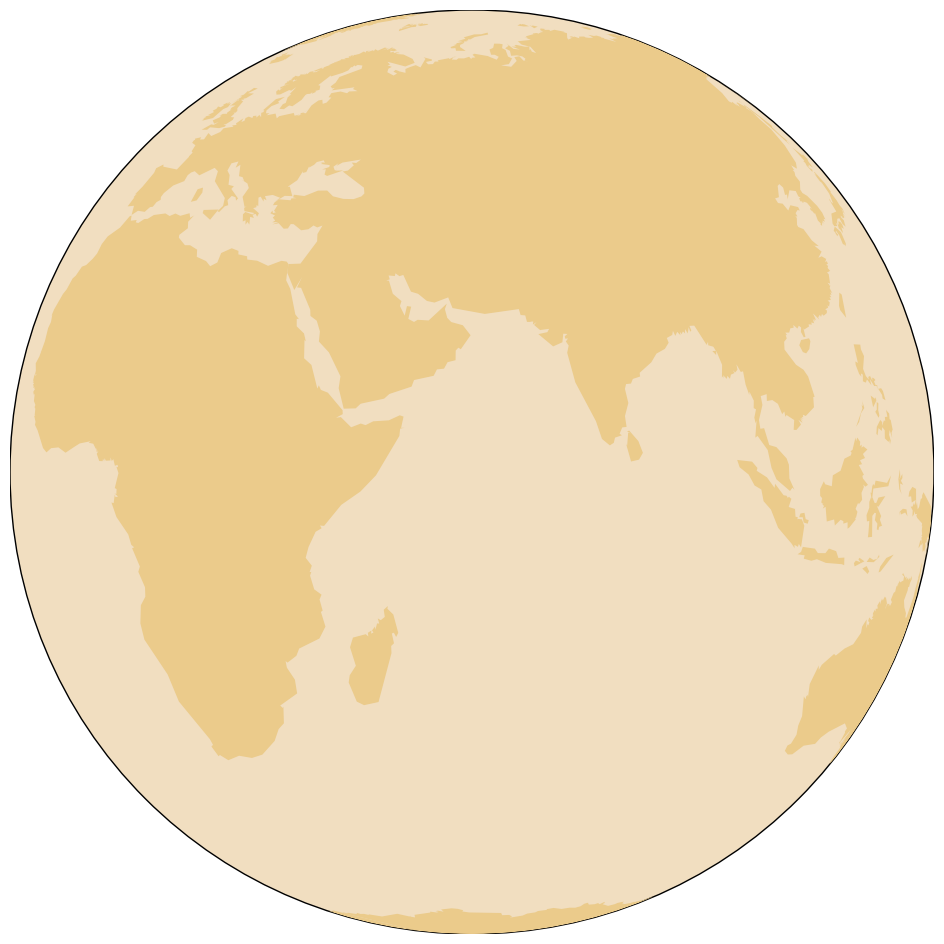

In [18]:
map_right = Basemap(projection='ortho', lon_0=60, lat_0=5)
map_right.drawmapboundary(fill_color='#f1dec0'), 
map_right.fillcontinents(color='#ebcb8b',lake_color='#ebcb8b')
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import cartopy.crs as ccrs
import cartopy.feature as cfeature

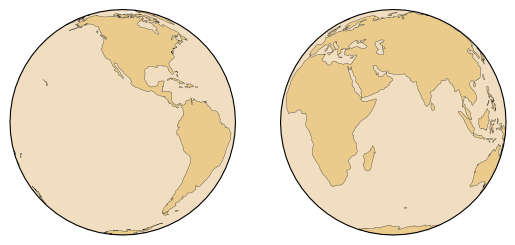

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(60, 0))
ax1.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=0, edgecolor='black', linewidth=0.2, facecolor='#ebcb8b')
ax2 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(-110, 0))
ax2.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax2.add_feature(cfeature.LAND, zorder=0, edgecolor='black', linewidth=0.2, facecolor='#ebcb8b')
plt.show()

In [3]:
choro_df = geopandas.read_file("data-giammaria/brown_and_black_chloropleths.json")
# choro_df2 = geopandas.read_file("data-giammaria/brown_and_black_chloropleths.topojson")

In [7]:
import pyproj

ortho1 = pyproj.Proj(proj='ortho', lat_0=0, lon_0=60, ellps='clrk66').srs
ortho2 = pyproj.Proj(proj='ortho', lat_0=0, lon_0=-110, ellps='clrk66').srs

In [5]:
# choro_df = choro_df.to_crs("epsg:9840")
choro_df1, choro_df2 = choro_df.to_crs(crs=ortho1), choro_df.to_crs(crs=ortho2)

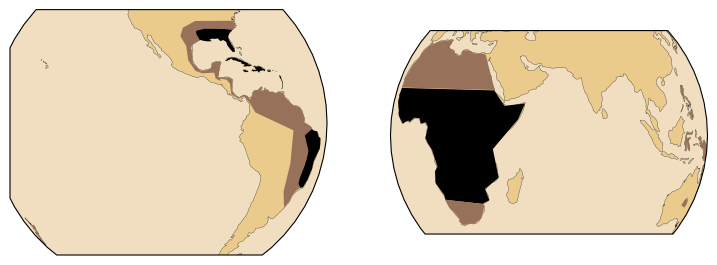

In [14]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(60, 0))
ax1.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=0, edgecolor='black', linewidth=0.2, facecolor='#ebcb8b')
choro_df1.plot(ax=ax1, color=choro_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
ax2 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(-110, 0))
ax2.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax2.add_feature(cfeature.LAND, zorder=0, edgecolor='black', linewidth=0.2, facecolor='#ebcb8b')
choro_df2.plot(ax=ax2, color=choro_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
plt.show()

In [6]:
land_df = geopandas.read_file("data-giammaria/land.json")

In [7]:
land_df1, land_df2 = land_df.to_crs(crs=ortho1), land_df.to_crs(crs=ortho2)

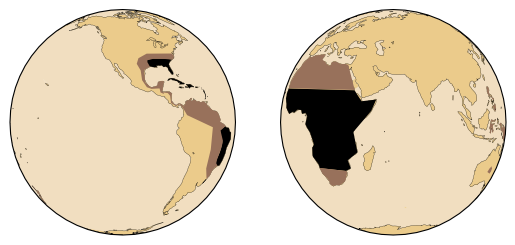

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(60, 0))
land_df1.plot(ax=ax1, facecolor='#ebcb8b', missing_kwds={"fill": True, "fillColor": '#ebcb'}, edgecolor='black', linewidth=0.2)
choro_df1.plot(ax=ax1, color=choro_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
ax1.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=0, facecolor='#ebcb8b')
ax2 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(-110, 0))
land_df2.plot(ax=ax2, facecolor='#ebcb8b', edgecolor='black', linewidth=0.2)
choro_df2.plot(ax=ax2, color=choro_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
ax2.add_feature(cfeature.LAND, zorder=0, facecolor='#ebcb8b')
ax2.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
plt.show()

In [8]:
routes_df = geopandas.read_file("data-giammaria/features2.json")

In [11]:
routes_df1, routes_df2 = routes_df.to_crs(crs=ortho1), routes_df.to_crs(crs=ortho2)

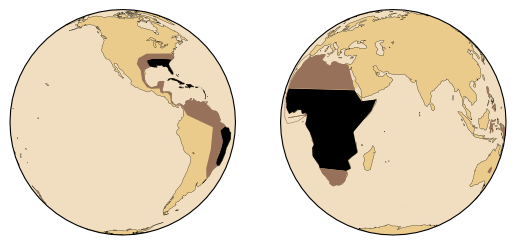

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(60, 0))
land_df1.plot(ax=ax1, facecolor='#ebcb8b', missing_kwds={"fill": True, "fillColor": '#ebcb'}, edgecolor='black', linewidth=0.2)
choro_df1.plot(ax=ax1, color=choro_df1.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
ax1.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=0, facecolor='#ebcb8b')
routes_df1.plot(ax=ax1, color='#98715B', linewidth=0.4)

ax2 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(-110, 0))
land_df2.plot(ax=ax2, facecolor='#ebcb8b', edgecolor='black', linewidth=0.2)
choro_df2.plot(ax=ax2, color=choro_df2.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'})
ax2.add_feature(cfeature.LAND, zorder=0, facecolor='#ebcb8b')
ax2.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
routes_df2.plot(ax=ax2, color='#98715B', linewidth=0.4)

plt.show()

<Axes: >

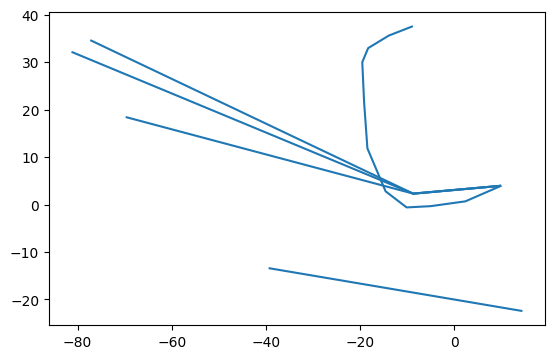

In [10]:
# What's going on with the routes? Some are missing
routes_df.plot()

(<Axes: >, <Axes: >)

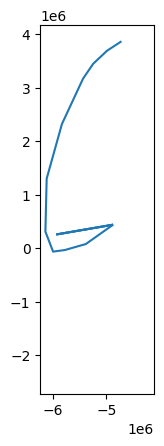

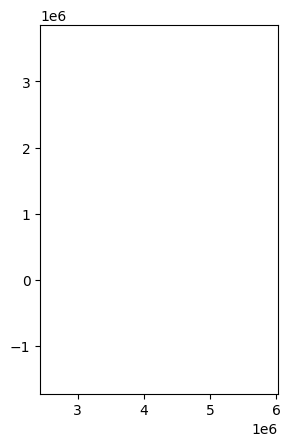

In [12]:
routes_df1.plot(), routes_df2.plot()

In [13]:
# Let's try overlay to combine two dataframes
all_features = choro_df.overlay(routes_df, how='union', keep_geom_type=False)

<Axes: >

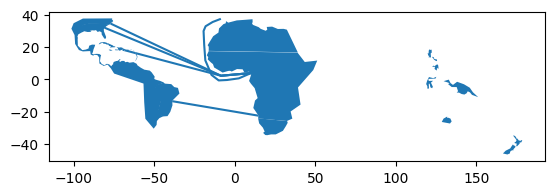

In [14]:
all_features.plot()

In [15]:
all_features1, all_features2 = all_features.to_crs(crs=ortho1), all_features.to_crs(crs=ortho2)

(<Axes: >, <Axes: >)

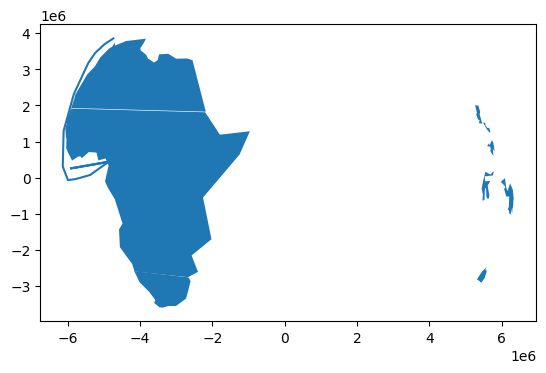

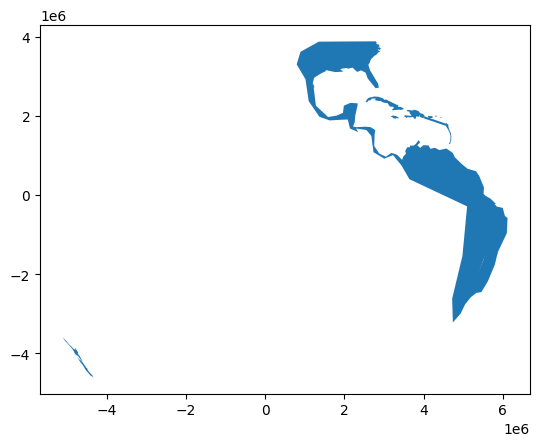

In [21]:
all_features1.plot(), all_features2.plot()

In [22]:
#  Same issue with the routes :(

In [3]:
features_df = geopandas.read_file("features_based_on_giammaria.json")

<Axes: >

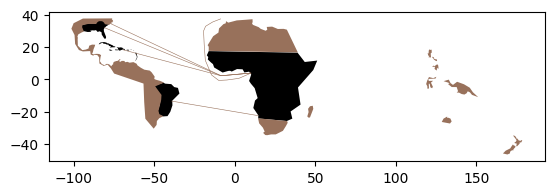

In [25]:
features_df.plot(color=features_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'}, linewidth=0.4)

In [33]:
lon_0, lat_0 = 60, 0

In [36]:
ortho = pyproj.Proj(proj='ortho', ellps='clrk66').srs

# features_ortho = features_df.to_crs("epsg:9840")
features_ortho = features_df.to_crs(crs=ortho)

<Axes: >

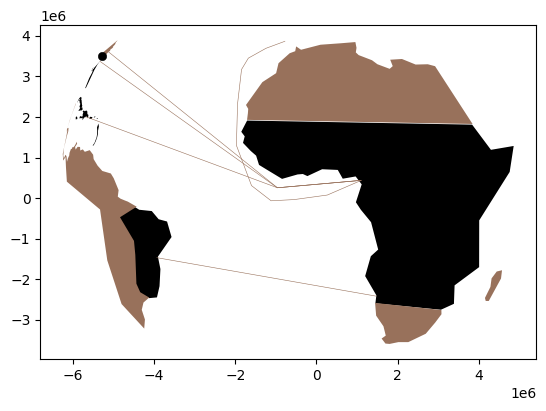

In [37]:
features_ortho.plot(color=features_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'}, linewidth=0.4)

<GeoAxes: >

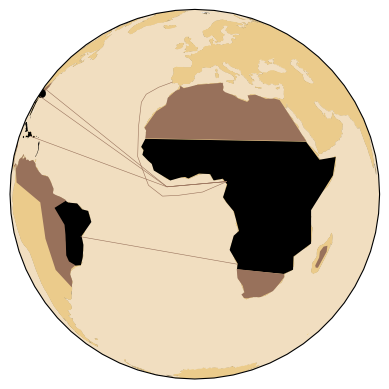

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic())
ax1.add_feature(cfeature.OCEAN, zorder=1, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=1, facecolor='#ebcb8b')
land_df.to_crs(crs=ortho).plot(ax=ax1,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=0)

features_ortho.plot(ax=ax1, color=features_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'}, linewidth=0.4)

In [143]:
ortho_1 = pyproj.Proj(proj='ortho', lat_0='10d', lon_0='-98d', ellps='clrk66').srs
features_ortho_1 = features_df.to_crs(crs=ortho_1)

In [145]:
ortho_2 = pyproj.Proj(proj='ortho', lat_0='10d', lon_0='50d', ellps='clrk66').srs
features_ortho_2 = features_df.to_crs(crs=ortho_2)

/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


<GeoAxes: >

/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/eleonore/.virtualenv/geopandas/lib/python3.10/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


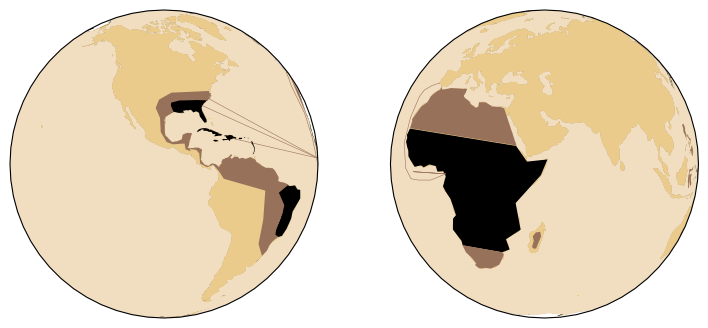

In [148]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(50, 10))
ax1.add_feature(cfeature.OCEAN, zorder=1, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=1, facecolor='#ebcb8b')
land_df.to_crs(crs=ortho_2).plot(ax=ax1,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=0)
features_ortho_2.plot(ax=ax1,color=features_ortho_2.fill, linewidth=0.4)

ax2 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(-98, 10))
ax2.add_feature(cfeature.OCEAN, zorder=1, facecolor='#f1dec0')
ax2.add_feature(cfeature.LAND, zorder=1, facecolor='#ebcb8b')
land_df.to_crs(crs=ortho_1).plot(ax=ax2,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=0)
features_ortho_1.plot(ax=ax2,color=features_ortho_1.fill, linewidth=0.4, markersize=2)

In [162]:
mw = pyproj.Proj(proj='moll').srs

features_mw = features_df.to_crs(crs=mw)

<GeoAxes: >

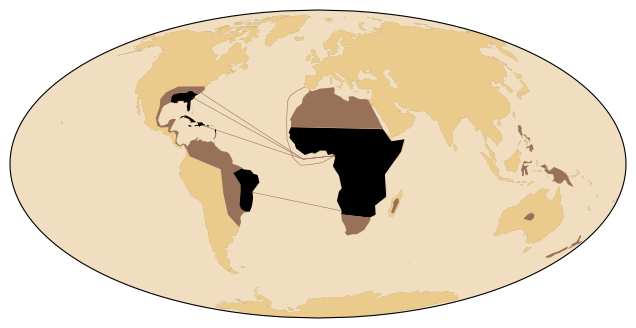

In [164]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax1.add_feature(cfeature.OCEAN, zorder=1, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=1, facecolor='#ebcb8b')
land_df.to_crs(crs=mw).plot(ax=ax1,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=0)

features_mw.plot(ax=ax1, color=features_mw.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'}, linewidth=0.4)

In [32]:
mw180 = pyproj.Proj(proj='moll', lon_0=100, lat_0=0).srs

features_mw180 = features_df.to_crs(crs=mw180)

<GeoAxes: >

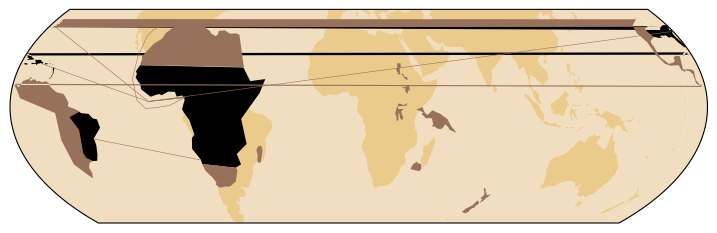

In [33]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=10))
ax1.add_feature(cfeature.OCEAN, zorder=1, facecolor='#f1dec0')
ax1.add_feature(cfeature.LAND, zorder=1, facecolor='#ebcb8b')
land_df.to_crs(crs=mw180).plot(ax=ax1,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=0)

features_mw180.plot(ax=ax1, color=features_mw180.fill, missing_kwds={"fill": True, "fillColor": '#ebcb'}, linewidth=0.4)

In [8]:
eqc = pyproj.Proj(proj='eqc').srs

features_eqc = features_df.to_crs(crs=eqc)

<GeoAxes: >

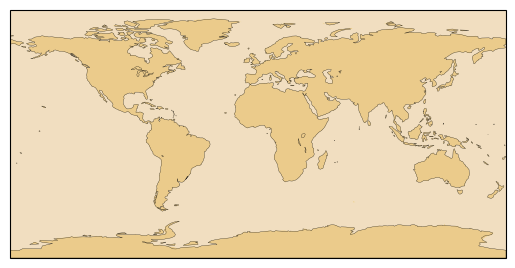

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='#f1dec0')
ax.add_feature(cfeature.LAND, zorder=0, facecolor='#ebcb8b')
land_df.plot(ax=ax,facecolor='#ebcb8b', edgecolor='black', linewidth=0.2, zorder=1)

features_eqc.plot(ax=ax, color=features_df.fill, linewidth=0.4, zorder=2)

<Axes: >

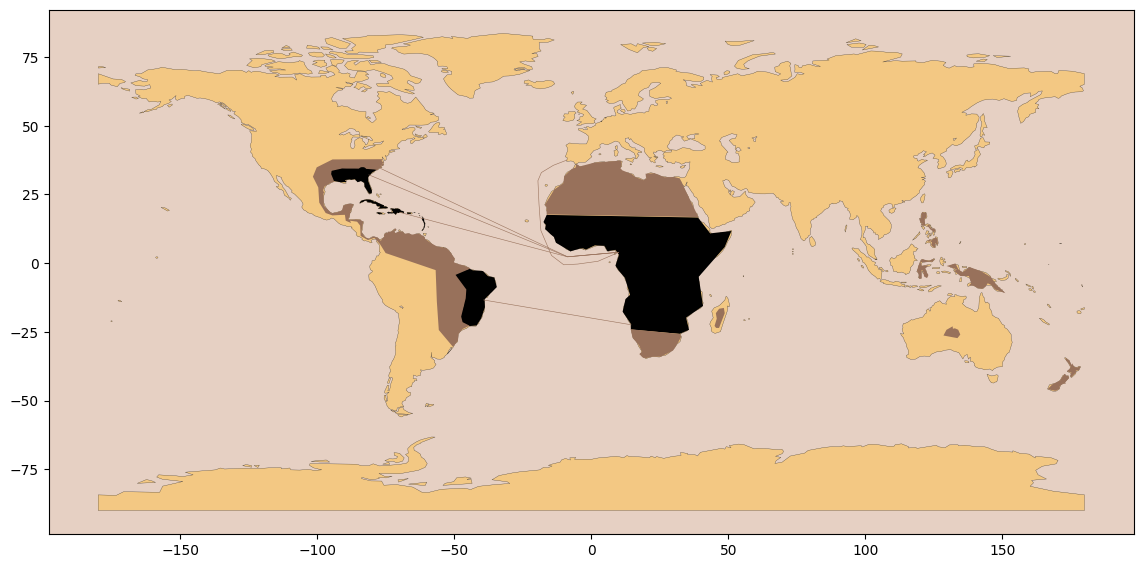

In [12]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#e6d0c3")
land_df.plot(ax=ax,facecolor='#f7c673', alpha=.8, edgecolor='black', linewidth=0.2, missing_kwds={"fill": True, "fillColor": '#ebcb8b'})
features_df.plot(ax=ax, color=features_df.fill, missing_kwds={"fill": True, "fillColor": '#ebcb8b'}, linewidth=0.4)